Description: this notebook uses the pretrained Vision Transformer (ViT) model found on Hugging Face:
https://huggingface.co/google/vit-base-patch16-224

The ViT model is pre-trained on ImageNet-21k (14 million images, 21,843 classes) at resolution 224x224, and fine-tuned on ImageNet 2012 (1 million images, 1,000 classes) at resolution 224x224. 

In this notebook, I explore performance on our family cat, which is apparently a surprisingly hard cat to identify



In [1]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

2023-06-10 17:17:21.012435: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Load Pre-trained Google / Hugging Face Model

In [2]:
# default download dir is ~/.cache/huggingface/hub
#feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
feature_extractor = ViTFeatureExtractor.from_pretrained('./test-cats_vs_dogs/')


/home/dm/miniconda3/envs/xformers/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [3]:
# default download dir is ~/.cache/huggingface/hub
#model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224') #original vit
model = ViTForImageClassification.from_pretrained('./test-cats_vs_dogs/') #final saved
#model = ViTForImageClassification.from_pretrained('./test-cats_vs_dogs/checkpoint-2105') #first checkpoint
#model = ViTForImageClassification.from_pretrained('./test-cats_vs_dogs/checkpoint-4210') #"best checkpoint"
#model = ViTForImageClassification.from_pretrained('./test-cats_vs_dogs/checkpoint-6315') #last checkpoint


In [4]:
print(model)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_

# Check on Huggingface Data Example

Predicted class: Cat


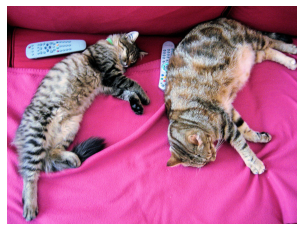

In [5]:
url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)
#show image
plt.figure()
plt.imshow(image)
plt.axis("off")
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

# Helper Function to Show Results

In [6]:
#set size of images used by model
image_size = (224,224)

def show_result(path):
    
    #load
    image = keras.preprocessing.image.load_img(path, target_size=image_size)
    
    #show image
    plt.figure()
    plt.imshow(image)
    plt.axis("off")
    
    #make predicitons and add to figure label
    inputs = feature_extractor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_idx = logits.argmax(-1).item()
    lbls = model.config.id2label[predicted_class_idx]
    plt.title(f"Predicted class: {lbls}")

    

# Check on Problematic Example

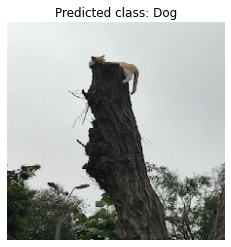

In [7]:
mydir = "/home/dm/ml_n_code/cats_vs_dogs/data/"
img_path = mydir+"test/Cat/"+str(38)+".jpg"
show_result(img_path)

# Checking on Kaggle / Microsoft Cats vs Dogs Data

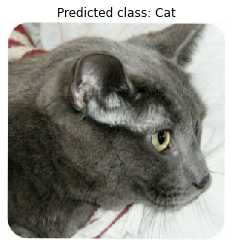

In [8]:
#img_path = "kagglecatsanddogs_5340/PetImages_trimmed/Cat/6779.jpg"
img_path = mydir+"train/Cat/6779.jpg"

show_result(img_path)

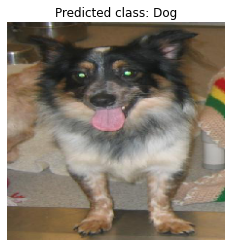

In [9]:
img_path = mydir+"train/Dog/6779.jpg"
show_result(img_path)

# Checking on Our Family's Turkish Van Cat

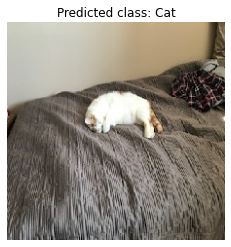

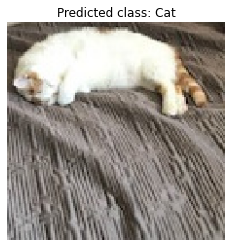

In [10]:
img_path = mydir+"test/Cat/2"+".jpg"
show_result(img_path)
img_path = mydir+"test/Cat/2e"+".jpg"
show_result(img_path)

/tmp/ipykernel_20714/2745868969.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


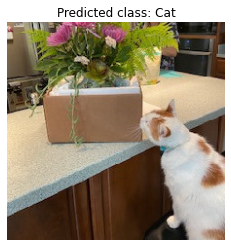

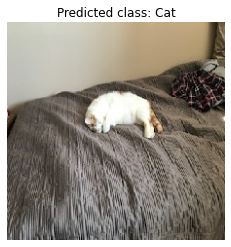

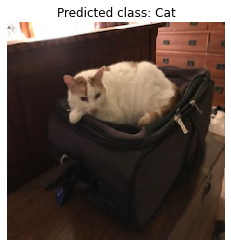

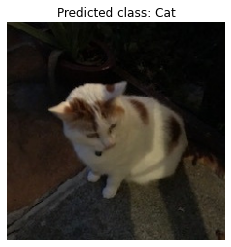

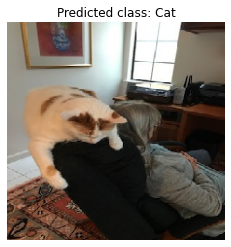

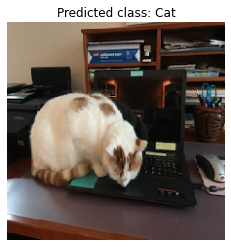

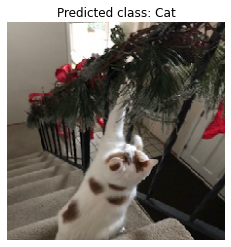

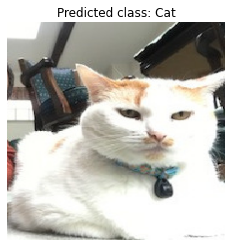

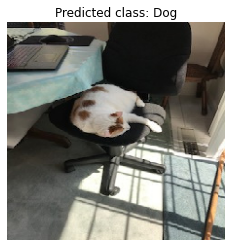

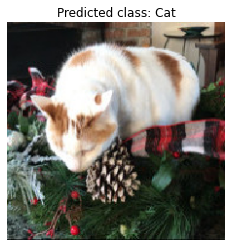

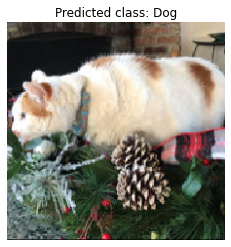

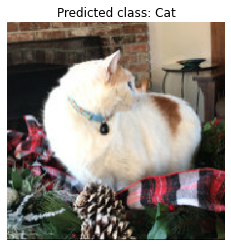

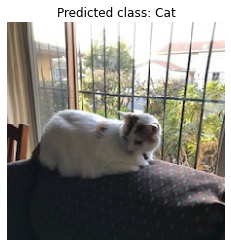

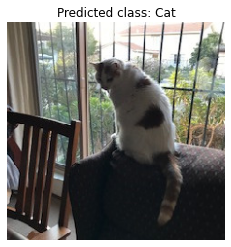

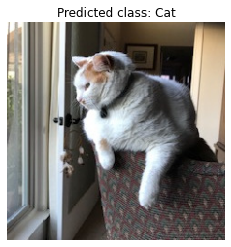

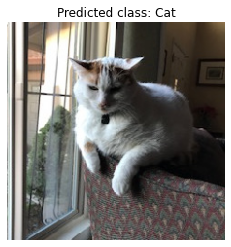

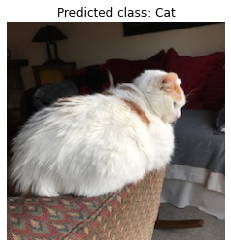

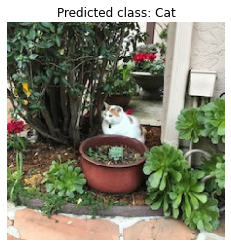

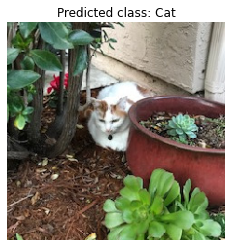

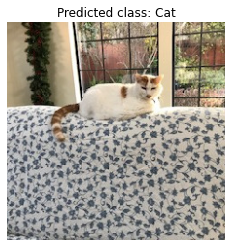

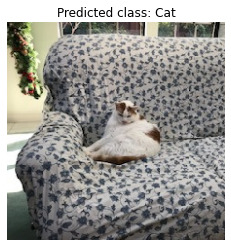

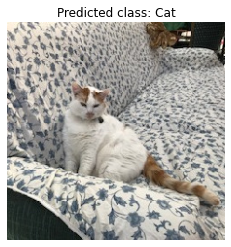

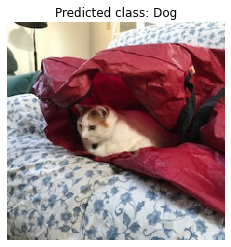

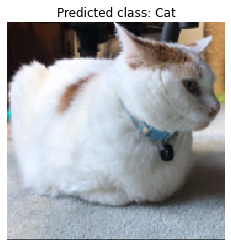

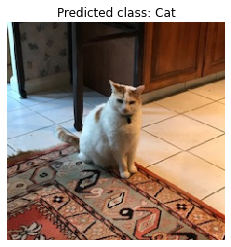

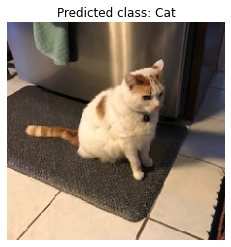

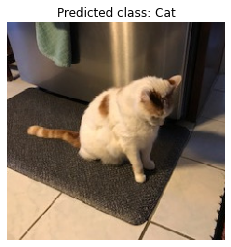

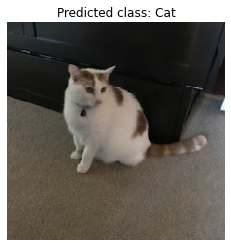

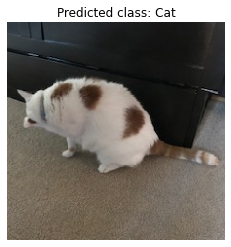

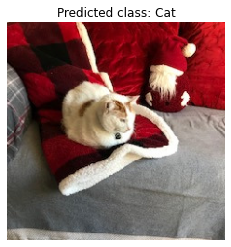

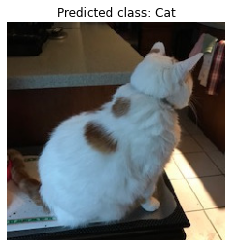

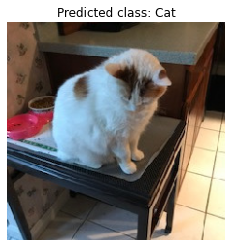

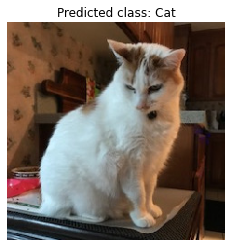

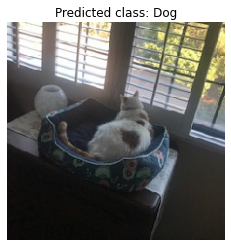

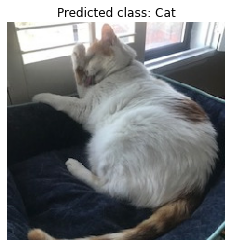

In [11]:
for ii in range(1,36):
    img_path = mydir+"test/Cat/"+str(ii)+".jpg"
    show_result(img_path)

In [12]:
# Old results on our cat:
# 17 cat calls
# 8 dog calls
# 10 other calls (floormat, printer, etc.)

# New fine-tuned results on our cat:
# 31 cat calls
# 4 dog calls
# 0 other calls (floormat, printer, etc.)


# Checking on Friend's and Family's Dogs

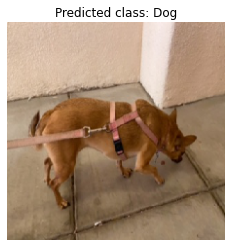

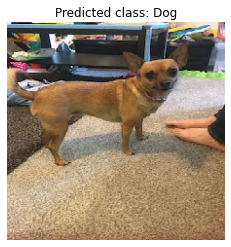

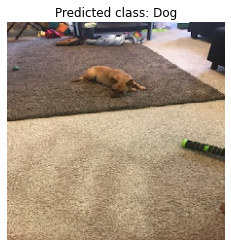

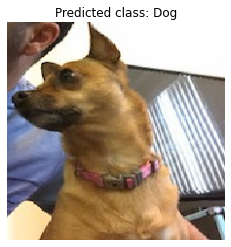

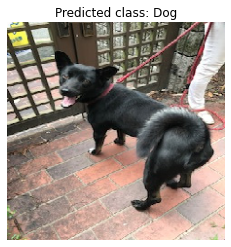

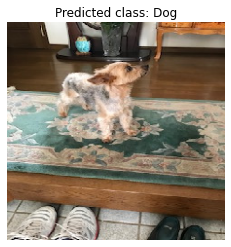

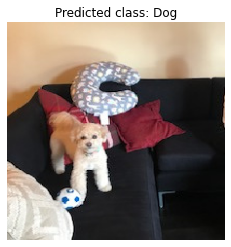

In [13]:
for ii in range(1,8):
    img_path = mydir+"test/Dog/"+str(ii)+".jpg"
    show_result(img_path)

In [ ]:
# Old results on dogs: 
#all 7 called dog; caveat: last one called toy poodle


# New fine-tuned results on dogs: 
#all 7 called dog
